In [1]:
import glob
import os

notes_path = "/home/jxm3/mimic/physionet.org/files/clinical-bert-mimic-notes/1.0.0/setup_outputs/*.csv"
glob.glob(os.path.expanduser(notes_path) + "*")

['/home/jxm3/mimic/physionet.org/files/clinical-bert-mimic-notes/1.0.0/setup_outputs/ICD9_Descriptions.csv',
 '/home/jxm3/mimic/physionet.org/files/clinical-bert-mimic-notes/1.0.0/setup_outputs/MedCAT_Descriptions.csv',
 '/home/jxm3/mimic/physionet.org/files/clinical-bert-mimic-notes/1.0.0/setup_outputs/SUBJECT_ID_to_ICD9.csv',
 '/home/jxm3/mimic/physionet.org/files/clinical-bert-mimic-notes/1.0.0/setup_outputs/SUBJECT_ID_to_MedCAT.csv',
 '/home/jxm3/mimic/physionet.org/files/clinical-bert-mimic-notes/1.0.0/setup_outputs/SUBJECT_ID_to_NAME.csv',
 '/home/jxm3/mimic/physionet.org/files/clinical-bert-mimic-notes/1.0.0/setup_outputs/SUBJECT_ID_to_NOTES_1a.csv',
 '/home/jxm3/mimic/physionet.org/files/clinical-bert-mimic-notes/1.0.0/setup_outputs/SUBJECT_ID_to_NOTES_1b.csv',
 '/home/jxm3/mimic/physionet.org/files/clinical-bert-mimic-notes/1.0.0/setup_outputs/SUBJECT_ID_to_NOTES_templates.csv',
 '/home/jxm3/mimic/physionet.org/files/clinical-bert-mimic-notes/1.0.0/setup_outputs/reidentified_s

In [2]:
import pandas as pd

# discharge = pd.read_csv('/home/jxm3/mimic/physionet.org/files/mimic-iv-note/2.2/note/discharge.csv')
df = pd.read_csv('/home/jxm3/mimic/physionet.org/files/clinical-bert-mimic-notes/1.0.0/setup_outputs/SUBJECT_ID_to_NOTES_1b.csv')

In [20]:
df.head()

,SUBJECT_ID,TEXT
0,2,Almeta Olivero nursing transfer note pt admitt...
1,2,Almeta Olivero neonatology attending triage no...
2,3,Kenton Lynn micu npn pm-pm: neuro: pt is restl...
3,3,Kenton Lynn micu nsg prog note: days remains s...
4,3,Kenton Lynn micu npn addendum: pt was agitated...


In [21]:
texts = df.sample(500)["TEXT"].tolist()
print(texts[0])

Dulcie Chrisp gu; cont running even.
Dulcie Chrisp well, str cath for cc icteric/sediment urine.
Dulcie Chrisp skin: drsg - vac drsg change tomorrow groin area with mod serous .


## Load model and evaluate

In [5]:
%load_ext autoreload
%autoreload 2

import os
os.environ["WANDB_DISABLED"] = "true"

import sys
sys.path = [
    p for p in sys.path
    if p not in ['/home/jxm3/research/prompting/imodelsX', '/home/jxm3/research/prompting/tree-prompt']
]
sys.path.append('/home/jxm3/research/retrieval/inversion')

In [8]:
import aliases

os.environ["TOKENIZERS_MULTIPROCESSING"] = "True"

# inv_trainer = aliases.load_trainer_from_alias("openai_msmarco__msl128__100epoch")
corr_experiment, corr_trainer = aliases.load_experiment_and_trainer_from_alias("gtr_nq__msl32_beta__correct")
inv_trainer = corr_trainer.inversion_trainer
# corr_trainer.precompute_hypotheses()
corr_trainer.model.eval()
print()

loading alias gtr_nq__msl32_beta__correct from /home/jxm3/research/retrieval/inversion/saves/47d9c149a8e827d0609abbeefdfd89ac...
> checkpoint: /home/jxm3/research/retrieval/inversion/saves/47d9c149a8e827d0609abbeefdfd89ac/checkpoint-558000
set dataset to nq
Corrector encoder noise level 0.0001
loading alias dpr_nq__msl32_beta from /home/jxm3/research/retrieval/inversion/saves/db66b9c01b644541fedbdcc59c53a285/ebb31d91810c4b62d2b55b5382e8c7ea...
Set num workers to 4
Overwriting max sequence length from 32 to 32
Overwriting use_less_data from None to -1
> checkpoint: /home/jxm3/research/retrieval/inversion/saves/db66b9c01b644541fedbdcc59c53a285/ebb31d91810c4b62d2b55b5382e8c7ea/checkpoint-999744
Loading datasets with TOKENIZERS_PARALLELISM = False


[nltk_data] Downloading package wordnet to /home/jxm3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jxm3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jxm3/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Renaming keys {'embedding_transform.2.bias', 'embedding_transform.2.weight'} for backward compatibility.
================ Begin trainer sanity check ================
	Input to encode -> Twas brillig, and the slithy toves, Did gyre and gimble in the wabe, All mimsy were the borogoves, And the mome raths outgrabe.
	Decoded output shape ->  torch.Size([1, 33])
	Decoded output -> The mlbies wase wyst bograge; And the sliths and toms wy
================ End trainer sanity check ================
Froze 342572160 params from model type <class 'models.inversion.InversionModel'>


[nltk_data] Downloading package wordnet to /home/jxm3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jxm3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jxm3/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Renaming keys {'embedding_transform.2.bias', 'embedding_transform.2.weight'} for backward compatibility.
================ Begin trainer sanity check ================
	Input to encode -> Twas brillig, and the slithy toves, Did gyre and gimble in the wabe, All mimsy were the borogoves, And the mome raths outgrabe.
	Decoded output shape ->  torch.Size([1, 33])
	Decoded output -> The slithe and the tobogbes were mly; It wis grabbse tiring
================ End trainer sanity check ================



In [11]:
trainer = corr_trainer

trainer.args.per_device_eval_batch_size = 128
trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "num_return_sequences": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
    # "max_length": 32,
    # "min_length": 32,
}
trainer.evaluate(
    eval_dataset=trainer.eval_dataset["nq"].select(range(500))
)

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multipro

[pred] to the character of the skull, which are relatively smooth and untornatuous of the sutures of infant skulls. In fact, one
[true] to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



[pred] individual from the Southern Hemisphere to win a Winter Olympic gold medal, and was also part of the short track relay team that won Australia'
[true] individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



[pred] the same rights as straight people, while 15% disagreed: they should be protected from discrimination and harassment. With 33% of those working people, other
[true] the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 0.6404249668121338,
 'eval_pred_num_tokens': 31.0,
 'eval_true_num_tokens': 32.0,
 'eval_token_set_precision': 0.7743381457308105,
 'eval_token_set_recall': 0.7886192024569372,
 'eval_token_set_f1': 0.7804492909969116,
 'eval_n_ngrams_match_1': 18.808,
 'eval_n_ngrams_match_2': 12.77,
 'eval_n_ngrams_match_3': 9.552,
 'eval_num_true_words': 24.368,
 'eval_num_pred_words': 24.374,
 'eval_bleu_score': 50.27598419041727,
 'eval_meteor_score': 0.7365934182852463,
 'eval_rouge_score': 0.7776004779063854,
 'eval_exact_match': 0.096,
 'eval_emb_cos_sim': 0.9553858041763306,
 'eval_runtime': 13.3148,
 'eval_samples_per_second': 37.552,
 'eval_steps_per_second': 0.3}

In [12]:
import datasets

temp_dataset = datasets.Dataset.from_dict({"text": texts})
datasets_dict = datasets.DatasetDict({
    "mimic": temp_dataset
})
d = corr_experiment._prepare_val_datasets_dict(
    model=corr_trainer.inversion_trainer.model,
    val_datasets_dict=datasets_dict,
    tokenizer=corr_trainer.tokenizer,
    embedder_tokenizer=corr_trainer.embedder_tokenizer,
)

Running tokenizer on dataset:   0%|          | 0/500 [00:00<?, ? examples/s]

Filter:   0%|          | 0/500 [00:00<?, ? examples/s]

In [13]:
corr_trainer.num_gen_recursive_steps = 1
corr_trainer.evaluate(
    eval_dataset=d["mimic"],
    metric_key_prefix="mimic"
)

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multipro

[pred] infant remains intubated via orthography. rn Rhona arson fmt: "[[Intimate v
[true] Rhona Arntson npn/- # resp: infant remains orally intubated on imv / r fi



[pred] Robison Dhi txesi nw hi he is (as he is from Daisecu
[true] Daisey Robison tsicu hpi: m from nh (where he is tx for



[pred] Inchtub: Side vent carett ot cont on rabbit bottom. Reminders: Pt eepout with caret
[true] Bunny Sidebottom resp care note: pt cont intub with oett and on mech vent as per carevu


{'mimic_loss': 2.540534734725952,
 'mimic_pred_num_tokens': 31.0,
 'mimic_true_num_tokens': 31.8671875,
 'mimic_token_set_precision': 0.38790304166526474,
 'mimic_token_set_recall': 0.42170989416238897,
 'mimic_token_set_f1': 0.4019655521323145,
 'mimic_n_ngrams_match_1': 6.952,
 'mimic_n_ngrams_match_2': 1.694,
 'mimic_n_ngrams_match_3': 0.47,
 'mimic_num_true_words': 17.404,
 'mimic_num_pred_words': 16.708,
 'mimic_bleu_score': 6.105571975783031,
 'mimic_meteor_score': 0.30649649559496844,
 'mimic_rouge_score': 0.41113120638842476,
 'mimic_exact_match': 0.0,
 'mimic_emb_cos_sim': 0.8349514007568359,
 'mimic_runtime': 11.3993,
 'mimic_samples_per_second': 43.863,
 'mimic_steps_per_second': 0.351}

In [14]:
corr_trainer.num_gen_recursive_steps = 50
corr_trainer.evaluate(
    eval_dataset=d["mimic"],
    metric_key_prefix="mimic"
)

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multipro

[pred] Rhona Arpson nrft:# infant remains intubated orally on resp. imv. m/n fi
[true] Rhona Arntson npn/- # resp: infant remains orally intubated on imv / r fi



[pred] Daisey Robison nsicu tph(H)I (where he is from Tx and he is
[true] Daisey Robison tsicu hpi: m from nh (where he is tx for



[pred] Bunt intub with Sidetub ot cont in the vent bottom. Care checks with Reepe ch & Meewchat:
[true] Bunny Sidebottom resp care note: pt cont intub with oett and on mech vent as per carevu


{'mimic_loss': 2.540534734725952,
 'mimic_pred_num_tokens': 31.0,
 'mimic_true_num_tokens': 31.8671875,
 'mimic_token_set_precision': 0.5978131929093035,
 'mimic_token_set_recall': 0.6192398117282577,
 'mimic_token_set_f1': 0.6065261858602529,
 'mimic_n_ngrams_match_1': 10.666,
 'mimic_n_ngrams_match_2': 4.938,
 'mimic_n_ngrams_match_3': 2.716,
 'mimic_num_true_words': 17.404,
 'mimic_num_pred_words': 17.25,
 'mimic_bleu_score': 24.70606748529998,
 'mimic_meteor_score': 0.5438123217302027,
 'mimic_rouge_score': 0.6416255455473412,
 'mimic_exact_match': 0.024,
 'mimic_emb_cos_sim': 0.9196556806564331,
 'mimic_runtime': 113.8696,
 'mimic_samples_per_second': 4.391,
 'mimic_steps_per_second': 0.035}

In [15]:
import torch
torch.cuda.empty_cache()

In [ ]:
corr_trainer.args.per_device_eval_batch_size = 16
corr_trainer.return_best_hypothesis = True
corr_trainer.num_gen_recursive_steps = 50
corr_trainer.sequence_beam_width = 8

corr_trainer.evaluate(
    eval_dataset=d["mimic"].select(range(500)),
    metric_key_prefix="mimic",
)

step 2 // scores = [0.9080994725227356, 0.9128465056419373, 0.8661249876022339, 0.9778810739517212, 0.9283829927444458, 0.9011157155036926, 0.9065167307853699, 0.847493588924408, 0.9849603176116943, 0.9683277010917664, 0.9026666283607483, 0.953502893447876, 0.9714666604995728, 0.9233239889144897, 0.9683810472488403, 0.9661393165588379]
step 3 // scores = [0.8873864412307739, 0.9128465056419373, 0.8912969827651978, 0.9853819608688354, 0.9443657994270325, 0.9155910015106201, 0.91724693775177, 0.8618159890174866, 0.9871394634246826, 0.9786344766616821, 0.92597496509552, 0.9735252857208252, 0.9773916006088257, 0.9387624263763428, 0.9606689810752869, 0.9569976329803467]
step 4 // scores = [0.905706524848938, 0.9128465056419373, 0.8932403326034546, 0.9852085709571838, 0.9537825584411621, 0.9363487958908081, 0.9221434593200684, 0.8937712907791138, 0.9873267412185669, 0.9756657481193542, 0.9810567498207092, 0.9767085909843445, 0.9860632419586182, 0.9431137442588806, 0.964727520942688, 0.967689

generating from val:   3%|█████▍                                                                                                                                                                      | 1/32 [04:19<2:14:00, 259.37s/it]

step 49 // scores = [0.9810293912887573, 0.9236685037612915, 0.9187914133071899, 0.9929417371749878, 0.9904714822769165, 0.9679760932922363, 0.9488542675971985, 0.9574112892150879, 0.9902530908584595, 0.9902888536453247, 0.9969592094421387, 0.9861418008804321, 0.9905743598937988, 1.0, 0.9803959131240845, 0.9774338006973267]
step 0 // scores = [0.8267239332199097, 0.9191904067993164, 0.8725723028182983, 0.9371799230575562, 0.8777627944946289, 0.960262656211853, 0.8084301948547363, 0.871792733669281, 0.8439506888389587, 0.8216861486434937, 0.8938430547714233, 0.8901692628860474, 0.9064439535140991, 0.96889728307724, 0.8577687740325928, 0.8387563228607178]
step 1 // scores = [0.918228268623352, 0.938942015171051, 0.9182579517364502, 0.980880856513977, 0.9114490151405334, 0.977314293384552, 0.8809801936149597, 0.8736569285392761, 0.9104112982749939, 0.8734826445579529, 0.9292247891426086, 0.9143580198287964, 0.9233216643333435, 0.9830178618431091, 0.8795239329338074, 0.8670330047607422]
st

generating from val:   6%|██████████▊                                                                                                                                                                 | 2/32 [08:38<2:09:33, 259.11s/it]

step 49 // scores = [0.9519884586334229, 0.9817575812339783, 0.9968228340148926, 1.0, 0.9829210638999939, 0.9873801469802856, 1.0, 1.0, 0.9668348431587219, 0.9539260864257812, 0.9835131764411926, 1.0, 0.9884482622146606, 0.9999999403953552, 0.9810787439346313, 0.9858015179634094]
step 0 // scores = [0.8604744672775269, 0.776183009147644, 0.9259134531021118, 0.918300986289978, 0.7694414854049683, 0.9228008985519409, 0.845797061920166, 0.7627635598182678, 0.8752633333206177, 0.8531368970870972, 0.8687609434127808, 0.9589959979057312, 0.8892865180969238, 0.8653794527053833, 0.7871833443641663, 0.8125061988830566]
step 1 // scores = [0.8751786947250366, 0.8361459374427795, 0.9513744711875916, 0.9492038488388062, 0.8821084499359131, 0.9417058229446411, 0.8826895952224731, 0.8161242008209229, 0.9352670907974243, 0.9183065891265869, 0.9114432334899902, 0.9703457951545715, 0.9246299266815186, 0.9372870922088623, 0.873916506767273, 0.8271540999412537]
step 2 // scores = [0.8834123015403748, 0.8

generating from val:   9%|████████████████▏                                                                                                                                                           | 3/32 [12:58<2:05:22, 259.40s/it]

step 49 // scores = [0.8820149898529053, 0.9630733728408813, 0.9771044254302979, 0.9787425994873047, 0.9999999403953552, 0.9869393706321716, 0.9963264465332031, 0.9567197561264038, 1.0, 0.9791542887687683, 0.998801589012146, 1.0, 0.9939286708831787, 0.9916691780090332, 0.989422619342804, 0.9696069955825806]
step 0 // scores = [0.8834584355354309, 0.8282892107963562, 0.8834870457649231, 0.9635215997695923, 0.722139835357666, 0.9085930585861206, 0.7576936483383179, 0.8882130980491638, 0.8574685454368591, 0.8113493919372559, 0.8910210132598877, 0.8516417741775513, 0.864518404006958, 0.9387367367744446, 0.8310520052909851, 0.890671968460083]
step 1 // scores = [0.9404194355010986, 0.8769214153289795, 0.9633893370628357, 0.9708529114723206, 0.7460522651672363, 0.9517674446105957, 0.8028191328048706, 0.9216238260269165, 0.8750524520874023, 0.8805162906646729, 0.9400304555892944, 0.934012234210968, 0.9160807132720947, 0.9617082476615906, 0.8944097757339478, 0.9181249141693115]
step 2 // score

generating from val:  12%|█████████████████████▌                                                                                                                                                      | 4/32 [17:12<2:00:03, 257.26s/it]

step 49 // scores = [0.9730339050292969, 0.906269371509552, 0.9999999403953552, 0.9983487129211426, 0.8608746528625488, 0.9948532581329346, 0.9999999403953552, 0.9624990224838257, 0.9868711233139038, 0.9772727489471436, 0.992077112197876, 0.9812315702438354, 0.9799478054046631, 0.9999999403953552, 0.9882738590240479, 0.994499683380127]
step 0 // scores = [0.7571776509284973, 0.9168109893798828, 0.9113327264785767, 0.8965917229652405, 0.9069926738739014, 0.8251004219055176, 0.6836695075035095, 0.9089842438697815, 0.8880213499069214, 0.8341569900512695, 0.8927357196807861, 0.7996726036071777, 0.7759525179862976, 0.8312033414840698, 0.8910169005393982, 0.8248875141143799]
step 1 // scores = [0.8262358903884888, 0.9533703327178955, 0.9307514429092407, 0.936837375164032, 0.9735932350158691, 0.897490382194519, 0.7091205716133118, 0.9400796890258789, 0.9422122240066528, 0.8692492842674255, 0.9561313390731812, 0.8504271507263184, 0.8204787969589233, 0.9335005283355713, 0.9319649934768677, 0.92

generating from val:  16%|██████████████████████████▉                                                                                                                                                 | 5/32 [21:28<1:55:39, 257.00s/it]

step 49 // scores = [0.9123564958572388, 0.9668761491775513, 0.9793803691864014, 0.9803996682167053, 1.0, 0.9894174337387085, 0.9701578617095947, 0.9904801845550537, 0.9835997819900513, 0.9788714647293091, 0.9999999403953552, 0.9829961061477661, 0.9788669943809509, 0.9811545610427856, 0.9857169389724731, 0.9262185096740723]
step 0 // scores = [0.8443304896354675, 0.7986059188842773, 0.9186729192733765, 0.7843968868255615, 0.8806224465370178, 0.8424132466316223, 0.9396225810050964, 0.9013481140136719, 0.8727336525917053, 0.8195221424102783, 0.8834031820297241, 0.8141615390777588, 0.8156449198722839, 0.8134415745735168, 0.7829057574272156, 0.9517611265182495]
step 1 // scores = [0.9174215197563171, 0.8265753984451294, 0.9408919811248779, 0.9538336992263794, 0.9399848580360413, 0.9051555395126343, 0.957979142665863, 0.9469705820083618, 0.9534817934036255, 0.8500596284866333, 0.9192025065422058, 0.8678849935531616, 0.8847332000732422, 0.8503097295761108, 0.8509505391120911, 0.9666466712951

generating from val:  19%|████████████████████████████████▎                                                                                                                                           | 6/32 [25:47<1:51:40, 257.72s/it]

step 49 // scores = [0.9774829745292664, 0.9257837533950806, 0.9816334247589111, 0.9842998385429382, 0.9869863390922546, 0.9641395807266235, 0.9999999403953552, 1.0, 0.988061785697937, 0.9227102994918823, 0.9621091485023499, 0.9166173934936523, 0.9944615364074707, 0.9964190721511841, 0.9999999403953552, 0.995389997959137]
step 0 // scores = [0.745542049407959, 0.7867019176483154, 0.9541758298873901, 0.80840003490448, 0.9023669958114624, 0.8681244254112244, 0.8600084781646729, 0.8188434839248657, 0.8064296245574951, 0.8831193447113037, 0.8162567019462585, 0.8950934410095215, 0.9242702722549438, 0.9040960073471069, 0.7499116659164429, 0.8656787872314453]
step 1 // scores = [0.8521391153335571, 0.8227596282958984, 0.9568958282470703, 0.8637760281562805, 0.9050876498222351, 0.8930128216743469, 0.8734951615333557, 0.8390811085700989, 0.8497912883758545, 0.9246756434440613, 0.9046350717544556, 0.9551108479499817, 0.9632816910743713, 0.9650932550430298, 0.8120517730712891, 0.8984150886535645]

generating from val:  22%|█████████████████████████████████████▋                                                                                                                                      | 7/32 [30:02<1:47:01, 256.87s/it]

step 49 // scores = [0.9728367328643799, 0.940863311290741, 0.9876229166984558, 0.9696763753890991, 0.9968466758728027, 0.9902933835983276, 0.9816296100616455, 0.9247668981552124, 0.9126650094985962, 0.9708551168441772, 0.9657641053199768, 0.9796893000602722, 0.9754051566123962, 0.9999999403953552, 0.9213988780975342, 0.968836784362793]
step 0 // scores = [0.8363781571388245, 0.7963107228279114, 0.8482731580734253, 0.9370306730270386, 0.8630764484405518, 0.9244717955589294, 0.7681587934494019, 0.8720600605010986, 0.8649042844772339, 0.7960038185119629, 0.8957148790359497, 0.8573137521743774, 0.9598089456558228, 0.8838894367218018, 0.9057577252388, 0.8528843522071838]
step 1 // scores = [0.8826332092285156, 0.9129550457000732, 0.8728801012039185, 0.9616562724113464, 0.9119980335235596, 0.941106915473938, 0.7837932109832764, 0.9317606687545776, 0.9230843782424927, 0.8452102541923523, 0.9354376792907715, 0.8970957398414612, 0.9892440438270569, 0.9329814910888672, 0.9507495164871216, 0.846

generating from val:  25%|███████████████████████████████████████████                                                                                                                                 | 8/32 [34:21<1:42:56, 257.37s/it]

step 49 // scores = [0.955154538154602, 0.9523158669471741, 0.9410139322280884, 0.9739487171173096, 1.0, 0.9667209982872009, 0.8238663673400879, 0.9607306122779846, 1.0, 0.8518913984298706, 0.9863511323928833, 0.9537497758865356, 0.9999998807907104, 0.9582027196884155, 0.9895203113555908, 0.8923401236534119]
step 0 // scores = [0.8760024309158325, 0.8986167907714844, 0.9287832975387573, 0.8554248809814453, 0.842743992805481, 0.7547683119773865, 0.8970987796783447, 0.7206268906593323, 0.9523407816886902, 0.7832274436950684, 0.8272439241409302, 0.9712871313095093, 0.8387324213981628, 0.8661726713180542, 0.7940151691436768, 0.7947602272033691]
step 1 // scores = [0.9271905422210693, 0.9274225234985352, 0.9382078647613525, 0.955914318561554, 0.8791328072547913, 0.9354205131530762, 0.943286657333374, 0.7782920002937317, 0.9725156426429749, 0.8533008694648743, 0.8453299403190613, 0.9917410612106323, 0.8855373859405518, 0.9022691249847412, 0.8045134544372559, 0.8697646260261536]
step 2 // sco

generating from val:  28%|████████████████████████████████████████████████▍                                                                                                                           | 9/32 [38:39<1:38:46, 257.69s/it]

step 49 // scores = [0.9887301921844482, 0.9617142081260681, 0.9784811735153198, 0.9960670471191406, 0.9784533381462097, 0.9865567684173584, 0.9999999403953552, 0.9718295335769653, 0.9949785470962524, 0.9352822303771973, 0.9562137126922607, 1.0, 0.9553266167640686, 0.9884353876113892, 0.9958595633506775, 0.8980010747909546]
step 0 // scores = [0.6957565546035767, 0.9055099487304688, 0.8555927276611328, 0.9264508485794067, 0.7562373876571655, 0.895455002784729, 0.9246459603309631, 0.8894608616828918, 0.8366065621376038, 0.7904465198516846, 0.8035762310028076, 0.89203280210495, 0.8953620791435242, 0.885668158531189, 0.8854029774665833, 0.8625949621200562]
step 1 // scores = [0.7745456695556641, 0.9592679738998413, 0.9048010110855103, 0.9827944040298462, 0.7602825164794922, 0.9629619717597961, 0.947697639465332, 0.9337069392204285, 0.8575063347816467, 0.8099596500396729, 0.8555722236633301, 0.9235571622848511, 0.9264984130859375, 0.8857258558273315, 0.9235804677009583, 0.915549635887146]


generating from val:  31%|█████████████████████████████████████████████████████▍                                                                                                                     | 10/32 [42:56<1:34:21, 257.34s/it]

step 49 // scores = [0.8881451487541199, 0.9905838966369629, 1.0, 1.0, 0.8711499571800232, 0.9881895780563354, 0.9836361408233643, 0.9930774569511414, 0.9142895340919495, 1.0, 0.9660072326660156, 0.9539760947227478, 0.9999999403953552, 1.0, 0.9892414808273315, 0.9999999403953552]
step 0 // scores = [0.8207163214683533, 0.8046622276306152, 0.7098261713981628, 0.7542316913604736, 0.7877137660980225, 0.8868521451950073, 0.8810910582542419, 0.8348381519317627, 0.785610556602478, 0.8652505278587341, 0.870714545249939, 0.8106604218482971, 0.885887861251831, 0.8707029223442078, 0.8375568389892578, 0.8367368578910828]
step 1 // scores = [0.8519253134727478, 0.8637686371803284, 0.8447305560112, 0.8696350455284119, 0.8049228191375732, 0.9624872207641602, 0.937348484992981, 0.8877899646759033, 0.900225818157196, 0.8968868851661682, 0.9024872779846191, 0.8187023401260376, 0.9137550592422485, 0.9168471097946167, 0.9111212491989136, 0.8583981394767761]
step 2 // scores = [0.9077482223510742, 0.88278

## measure name metrics


In [46]:
import torch

labels = torch.tensor(corr_trainer.preds_sample_labels_list)
preds = torch.tensor(corr_trainer.preds_sample_list)

# fix padding
eos_token_id = corr_trainer.embedder_tokenizer.eos_token_id
eos_tokens = (
    torch.ones(
        (len(preds), 1),
        dtype=torch.long,
        device=preds.device,
    )
    * eos_token_id
)
preds = torch.cat((preds[:, 1:], eos_tokens), dim=1)
assert labels.shape == preds.shape

In [48]:
from typing import Dict
import nltk


def evaluate_name_metrics(preds: torch.Tensor, labels: torch.Tensor) -> Dict[str, torch.Tensor]:
    pred_strs = corr_trainer.tokenizer.batch_decode(preds, skip_special_tokens=True)
    true_strs = corr_trainer.tokenizer.batch_decode(labels, skip_special_tokens=True)
    firsts_count = 0
    firsts_correct = 0
    lasts_count = 0
    lasts_correct = 0
    totals_count = 0
    totals_correct = 0
    for p, t in zip(pred_strs, true_strs):
        t = nltk.tokenize.word_tokenize(t)
        first, last = t[0], t[1]
        firsts_count += t.count(first)
        lasts_count += t.count(last)
        totals_count += "__".join(t).count("__".join([first, last]))
        #     
        p = nltk.tokenize.word_tokenize(p)
        firsts_correct += p.count(first)
        lasts_correct += p.count(last)
        totals_correct += "__".join(p).count("__".join([first, last]))
    return { "first": (firsts_correct / firsts_count), "last": (lasts_correct / lasts_count), "full": (totals_correct / totals_count) }

evaluate_name_metrics(preds, labels)

{'first': 0.9046199701937406,
 'last': 0.8734177215189873,
 'full': 0.8006329113924051}

In [49]:
corr_trainer.inversion_trainer.gen_kwargs

{'early_stopping': False,
 'num_beams': 1,
 'do_sample': False,
 'no_repeat_ngram_size': 0}

In [16]:
## now do single-step

corr_trainer.args.per_device_eval_batch_size = 16
corr_trainer.return_best_hypothesis = True
corr_trainer.num_gen_recursive_steps = 50
corr_trainer.sequence_beam_width = 8

corr_trainer.inversion_trainer.evaluate(
    eval_dataset=d["mimic"].select(range(500)),
    metric_key_prefix="mimic",
)

[pred] with bilateral hip ossia and rheumatoid arthritis Regia Klu - fMRI pain at home with
[true] Reginia Kloster sicu hpi: m presented to osh on with fever/chills and bilateral hip pain



[pred] a male of Rosalyn Yn amo (Hyl esote). He has XML editing and has
[true] Rosalynn Eynon this is a yo male with hx of aml s/p chemotherapy, found to



[pred] Reichert name: Aubery Reichert sex, date of birth, unit of service, sex and sex of
[true] Aubery Reichert name: reichert,aubery unit no: date of birth: sex: m service:


{'mimic_loss': 2.7380549907684326,
 'mimic_accuracy': 0.4318033854166667,
 'mimic_pred_num_tokens': 31.0,
 'mimic_true_num_tokens': 31.890625,
 'mimic_token_set_precision': 0.30447188321987734,
 'mimic_token_set_recall': 0.3348138985840214,
 'mimic_token_set_f1': 0.3165762396403704,
 'mimic_n_ngrams_match_1': 5.338541666666667,
 'mimic_n_ngrams_match_2': 1.0859375,
 'mimic_n_ngrams_match_3': 0.28125,
 'mimic_num_true_words': 17.1328125,
 'mimic_num_pred_words': 16.4296875,
 'mimic_bleu_score': 3.916002736499548,
 'mimic_meteor_score': 0.23425502943117402,
 'mimic_rouge_score': 0.31694972995276594,
 'mimic_exact_match': 0.0,
 'mimic_emb_cos_sim': 0.7712833881378174,
 'mimic_perplexity': 15.456892042479177,
 'mimic_runtime': 5.503,
 'mimic_samples_per_second': 90.859,
 'mimic_steps_per_second': 0.727}

In [23]:
import torch

labels = torch.tensor(trainer.preds_sample_labels_list)
preds = torch.tensor(trainer.preds_sample_list)

# fix padding
eos_token_id = corr_trainer.embedder_tokenizer.eos_token_id
eos_tokens = (
    torch.ones(
        (len(preds), 1),
        dtype=torch.long,
        device=preds.device,
    )
    * eos_token_id
)
preds = torch.cat((preds[:, 1:], eos_tokens), dim=1)
assert labels.shape == preds.shape

evaluate_name_metrics(preds, labels)

{'first': 0.9076923076923077,
 'last': 0.9032258064516129,
 'full': 0.8064516129032258}

## Evaluate entities

In [108]:
from typing import List

from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForTokenClassification

# https://huggingface.co/d4data/biomedical-ner-all

tokenizer = AutoTokenizer.from_pretrained("d4data/biomedical-ner-all")
model = AutoModelForTokenClassification.from_pretrained("d4data/biomedical-ner-all")
pipe = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="average") # pass device=0 if using gpu
    
def get_entities(ids) -> List:
    pred_strs = trainer.tokenizer.batch_decode(ids, skip_special_tokens=True)
    return [[e for e in ent_list if e['score'] >= .0] for ent_list in pipe(pred_strs)]

pred_entities = get_entities(preds)
label_entities = get_entities(labels)

In [76]:
pred_strs = trainer.tokenizer.batch_decode(preds, skip_special_tokens=True)
label_strs = trainer.tokenizer.batch_decode(labels, skip_special_tokens=True)

In [262]:
label_entities[5]

[{'entity_group': 'Detailed_description',
  'score': 0.77478313,
  'word': 'jody',
  'start': 0,
  'end': 4},
 {'entity_group': 'Detailed_description',
  'score': 0.4923038,
  'word': 'micu',
  'start': 18,
  'end': 22},
 {'entity_group': 'Lab_value',
  'score': 0.7944306,
  'word': 'quieter',
  'start': 46,
  'end': 53},
 {'entity_group': 'Date',
  'score': 0.34623772,
  'word': 'today',
  'start': 54,
  'end': 59},
 {'entity_group': 'Date',
  'score': 0.7546095,
  'word': 'previous',
  'start': 65,
  'end': 73},
 {'entity_group': 'Duration',
  'score': 0.8976435,
  'word': 'days',
  'start': 74,
  'end': 78},
 {'entity_group': 'Detailed_description',
  'score': 0.475221,
  'word': 'unitl',
  'start': 79,
  'end': 84},
 {'entity_group': 'Lab_value',
  'score': 0.89821523,
  'word': 'an',
  'start': 92,
  'end': 94}]

In [33]:
from collections import Counter

Counter([obj['entity_group'] for obj_list in pred_entities for obj in obj_list])

Counter({'Detailed_description': 68,
         'Therapeutic_procedure': 23,
         'Diagnostic_procedure': 43,
         'Sign_symptom': 36,
         'Disease_disorder': 26,
         'Biological_structure': 16,
         'Duration': 4,
         'Clinical_event': 9,
         'Lab_value': 34,
         'Medication': 11,
         'Age': 4,
         'Sex': 5,
         'Coreference': 4,
         'Activity': 3,
         'Nonbiological_location': 6,
         'Color': 1,
         'Time': 2,
         'History': 18,
         'Other_event': 4,
         'Family_history': 4,
         'Subject': 3,
         'Severity': 1})

In [34]:
Counter([obj['entity_group'] for obj_list in label_entities for obj in obj_list])

Counter({'Detailed_description': 77,
         'Therapeutic_procedure': 27,
         'Subject': 2,
         'Diagnostic_procedure': 32,
         'Sign_symptom': 46,
         'Lab_value': 29,
         'Biological_structure': 16,
         'Coreference': 4,
         'Disease_disorder': 25,
         'Date': 4,
         'Duration': 3,
         'History': 13,
         'Clinical_event': 10,
         'Age': 4,
         'Sex': 5,
         'Other_event': 2,
         'Medication': 9,
         'Nonbiological_location': 5,
         'Activity': 3,
         'Color': 1,
         'Time': 4,
         'Family_history': 2,
         'Severity': 1})

In [116]:
from typing import Dict, Tuple
from collections import defaultdict

strip_entity = lambda e: { 'entity_group': e['entity_group'], 'word': e['word']}

def get_entity_matches(pred_str, label_entities) -> Tuple[Dict, Dict]:
    matches = defaultdict(lambda: 0)
    misses = defaultdict(lambda: 0)
    label_entities = list(map(strip_entity, label_entities))
    for e in label_entities:
        g = e['entity_group']
        if e['word'] in pred_str:
            matches[g] += 1
        else:
            misses[g] += 1
    return matches, misses

#######################################################

full_matches = defaultdict(lambda: 0)
full_misses = defaultdict(lambda: 0)
full_hallucinations = defaultdict(lambda: 0)
for ps, le in zip(pred_strs, label_entities):
    matches, misses = get_entity_matches(ps, le)
    for k,v in matches.items(): full_matches[k] += v
    for k,v in misses.items(): full_misses[k] += v

In [289]:
import pandas as pd

data = [
    { 'type': 'match', **full_matches },
    { 'type': 'miss', **full_misses },
    # { 'type': 'hallucination', **full_hallucinations},
]

df = pd.DataFrame(data).fillna(0)
df.to_parquet("mimic_entities.parquet")
df = df.set_index('type')
df = df.transpose()
df.index = df.index.map(lambda s: s.replace('_', ' '))
df['sum'] = df['match'] + df['miss']

df = df[df['sum'] > 50]
df['match'] /= df['sum']
df['miss'] /= df['sum']

avg_match_score = df['match'].mean()
print(avg_match_score)
df = df.sort_values(by='match', ascending=True).iloc[-15:].drop('sum', axis=1)

df.head()

0.7200487985391212


type,match,miss
Detailed description,0.504726,0.495274
Diagnostic procedure,0.618056,0.381944
Medication,0.636364,0.363636
Disease disorder,0.666667,0.333333
Sign symptom,0.690583,0.309417


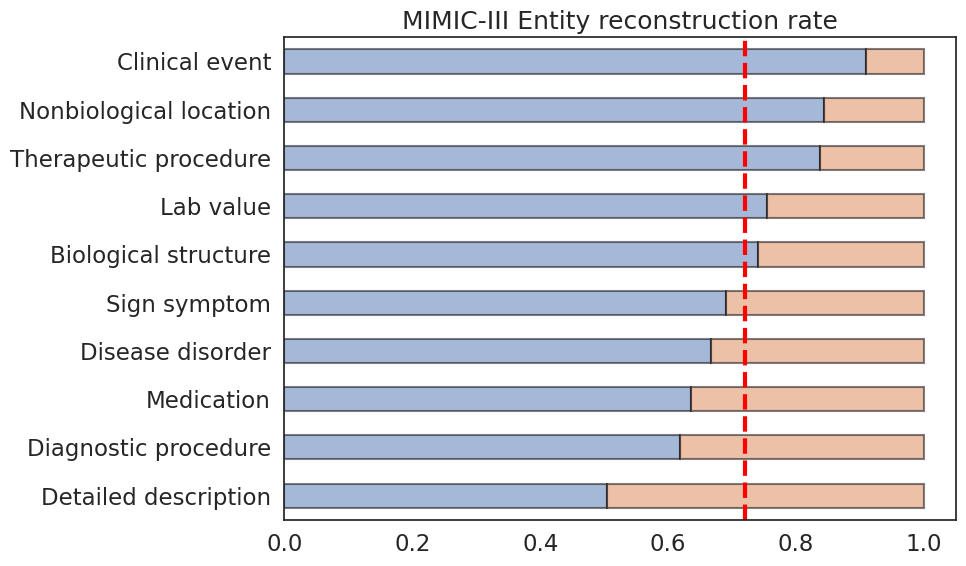

In [290]:
import seaborn as sns

sns.set(style="white", font_scale=1.5)

colors = sns.color_palette()

ax = df.plot.barh(stacked=True, color=colors, fill=True, alpha=.5, edgecolor='black', linewidth=1.5, figsize=(10,6), legend=False)
ax.axvline(x=avg_match_score, linestyle='--', color='red', lw=3)
# legend = ax.legend(title=None, bbox_to_anchor=(1, 1), loc=')
ax.set_title('MIMIC-III Entity reconstruction rate')

# legend_labels = {'match': 'True positive', 'miss': 'False negative'}
# for text in legend.get_texts():
#     text.set_text(legend_labels.get(text.get_text()))

plt.tight_layout()
plt.savefig('mimic_entities.pdf')
plt.show()


In [286]:
fle = [l for label_list in label_entities for l in label_list]
list(filter(lambda s: s['entity_group'] == 'Clinical_event', fle))

[{'entity_group': 'Clinical_event',
  'score': 0.45272914,
  'word': 'admission',
  'start': 28,
  'end': 37},
 {'entity_group': 'Clinical_event',
  'score': 0.50463617,
  'word': 'baby',
  'start': 35,
  'end': 39},
 {'entity_group': 'Clinical_event',
  'score': 0.9991517,
  'word': 'admitted',
  'start': 51,
  'end': 59},
 {'entity_group': 'Clinical_event',
  'score': 0.19001728,
  'word': 'spain',
  'start': 6,
  'end': 11},
 {'entity_group': 'Clinical_event',
  'score': 0.9414601,
  'word': 'present',
  'start': 104,
  'end': 111},
 {'entity_group': 'Clinical_event',
  'score': 0.81965923,
  'word': 'transfer',
  'start': 16,
  'end': 24},
 {'entity_group': 'Clinical_event',
  'score': 0.54184806,
  'word': 'present',
  'start': 66,
  'end': 73},
 {'entity_group': 'Clinical_event',
  'score': 0.831587,
  'word': 'admitted',
  'start': 70,
  'end': 78},
 {'entity_group': 'Clinical_event',
  'score': 0.68836945,
  'word': 'present',
  'start': 106,
  'end': 113},
 {'entity_group': 'C

In [287]:
list(filter(lambda s: s['entity_group'] == 'Detailed_description', fle))

[{'entity_group': 'Detailed_description',
  'score': 0.74976087,
  'word': 'imv /',
  'start': 63,
  'end': 68},
 {'entity_group': 'Detailed_description',
  'score': 0.9918803,
  'word': 'r fi',
  'start': 69,
  'end': 73},
 {'entity_group': 'Detailed_description',
  'score': 0.18034466,
  'word': ':',
  'start': 24,
  'end': 25},
 {'entity_group': 'Detailed_description',
  'score': 0.9864499,
  'word': 'bunny',
  'start': 0,
  'end': 5},
 {'entity_group': 'Detailed_description',
  'score': 0.5452492,
  'word': 'carevu',
  'start': 81,
  'end': 87},
 {'entity_group': 'Detailed_description',
  'score': 0.9998418,
  'word': 'watery',
  'start': 41,
  'end': 47},
 {'entity_group': 'Detailed_description',
  'score': 0.5187636,
  'word': 'gouker',
  'start': 8,
  'end': 14},
 {'entity_group': 'Detailed_description',
  'score': 0.77478313,
  'word': 'jody',
  'start': 0,
  'end': 4},
 {'entity_group': 'Detailed_description',
  'score': 0.4923038,
  'word': 'micu',
  'start': 18,
  'end': 22}